In [2]:
import  matplotlib.pyplot as plt
import numpy as np
import parse_active

import os, sys
import to_go_faster as tgf
import tools

from lib.ot_distances import Fused_Gromov_Wasserstein_distance
mutag_labels = ["C", "O", "Cl", "H", "N", "F", "Br", "S", "P", "I", "Na", "K", "Li", "Ca"]


In [3]:
def graph_distance(graph1, graph2, alpha=0.9):
    return Fused_Gromov_Wasserstein_distance(alpha=alpha, features_metric='dirac', method='shortest_path').graph_d(
        graph1, graph2)

In [4]:
rule = "23"
cls = 0
alpha = 0.90
a = "90"

In [5]:
path_to_active_egos = "../activ_ego/mutag_" + rule + "labels_egos.txt"
graphs_cls, means_number_of_nodes = parse_active.build_graphs_from_file(path_to_active_egos)
graphs = graphs_cls[cls]

Mean size of graphs: [9.14756447 9.59137056]


In [6]:
len(graphs)

3490

In [7]:
path_to_distances_matrix = "../../distances_matrix/"
distances_matrix = tgf.load_matrix_from_txt(path_to_distances_matrix, rule, cls, suff=".txt")
real_median_index = np.argmin(np.mean(distances_matrix, axis=0))
real_median_index

3407

In [8]:
graph_distance(graphs[0], graphs[3047])

/home/elouan/epita/lrde/optimal_transport_for_gnn/tests/lib/graph.py:145: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(self.nx_graph)


0.5960000000007554

In [9]:
def show_graph(i, save = False):
        distance_to_median = distances_matrix[real_median_index, i]
        tools.show_graph(tools.relabel_graph_to_mutag(graphs[i].nx_graph, mutag_labels), name="graph_" + str(i), layout="kamada_kawai", title="graph_" + str(i) + "\n Distance to the real median: " + str(distance_to_median), save=save)

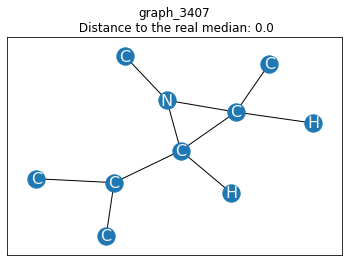

In [10]:
show_graph(3407, save=True)

In [11]:

path_to_log = "./log/r23/" # complete the path
suffix= "_r"
extension = ".txt.gz"
specific_name= "r" + rule + "_a" + a + suffix + extension

In [12]:
selected_graph = np.loadtxt(path_to_log + "selected_graphs_index_"  + specific_name)
distances_to_real_median = np.loadtxt(path_to_log + "distances_to_real_median_" + specific_name)
computation_time = np.loadtxt(path_to_log + "computation_time_" + specific_name)
distances_to_mean = np.loadtxt(path_to_log + "distances_to_mean_" + specific_name)
median_over_iterations = np.loadtxt(path_to_log + "median_over_iterations_" + specific_name)
cand_prob = np.loadtxt(path_to_log + "cand_prob_" + specific_name)
dist_c_s = np.loadtxt(path_to_log + "dist_c_s_" + specific_name)
dist_g_s = np.loadtxt(path_to_log + "dist_g_s_" + specific_name)

print(np.shape(cand_prob))

(17, 3490)


In [17]:
def show_plot(dist_real_median, comp_time, dist_mean, born_inf=0, borne_sup=len(graphs)):
        x = np.arange(born_inf, borne_sup)
        fig, ax1 = plt.subplots(figsize=(10,10))
        color = 'tab:blue'
        ax1.set_xlabel('Iteration')
        ax1.set_ylabel('Distance to the grand truth', color=color)
        ax1.plot(x,dist_real_median[born_inf:borne_sup], color=color)
        ax1.tick_params(axis='y', labelcolor=color)

        ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
        color = 'tab:red'
        ax2.set_ylabel('Computation time', color=color)  # we already handled the x-label with ax1
        ax2.plot(x,comp_time[born_inf:borne_sup], color=color)
        ax2.tick_params(axis='y', labelcolor=color)

        ax3 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
        color = 'tab:green'
        ax3.set_ylabel('Distance to the mean', color=color)  # we already handled the x-label with ax1
        ax3.plot(x,dist_mean[born_inf:borne_sup], color=color)
        ax3.tick_params(axis='y', labelcolor=color)

        fig.tight_layout()  # otherwise the right y-label is slightly clipped
        plt.savefig(path_to_log + "compute_dist_rm_dist_mean.png")
        plt.show()

        fig = plt.figure(figsize=(10,10))
        plt.plot(x,dist_real_median[born_inf:borne_sup], 'blue')
        plt.show()

        fig = plt.figure(figsize=(10,10))
        plt.plot(x,comp_time[born_inf:borne_sup], 'red')
        plt.show()

        fig = plt.figure(figsize=(10,10))
        plt.plot(x,dist_mean[born_inf:borne_sup], 'green')
        plt.show()

        ### Distance to the real median and distance candidate of iteration to set, log scale
        fig, ax1 = plt.subplots(figsize=(10,10))
        color = 'tab:blue'
        ax1.set_xlabel('Iteration')
        ax1.set_ylabel('Distance to the grand truth', color=color)
        ax1.plot(x,dist_real_median[born_inf:borne_sup], color=color)
        ax1.tick_params(axis='y', labelcolor=color)

        ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
        color = 'tab:red'
        ax2.set_ylabel('Distance candidate to set', color=color)  # we already handled the x-label with ax1
        ax2.plot(x,dist_c_s[born_inf:borne_sup], color=color)
        ax2.tick_params(axis='y', labelcolor=color)
        ax2.set_yscale('log')
        plt.savefig(path_to_log  + "dist_can_s_log.png")
        plt.show()

        ### Distance to the real median and distance candidate of iteration to set, linear scale
        fig, ax1 = plt.subplots(figsize=(10,10))
        color = 'tab:blue'
        ax1.set_xlabel('Iteration')
        ax1.set_ylabel('Distance to the grand truth', color=color)
        ax1.plot(x,dist_real_median[born_inf:borne_sup], color=color)
        ax1.tick_params(axis='y', labelcolor=color)

        ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
        color = 'tab:red'
        ax2.set_ylabel('Distance candidate to set', color=color)  # we already handled the x-label with ax1
        ax2.plot(x,dist_c_s[born_inf:borne_sup], color=color)
        ax2.tick_params(axis='y', labelcolor=color)
        plt.savefig(path_to_log  + "dist_can_s_lin.png")
        plt.show()

        ### Distance to the real median and distance selected graph of iteration to set, log scale
        fig, ax1 = plt.subplots(figsize=(10,10))
        color = 'tab:blue'
        ax1.set_xlabel('Iteration')
        ax1.set_ylabel('Distance to the grand truth', color=color)
        ax1.plot(x,dist_real_median[born_inf:borne_sup], color=color)
        ax1.tick_params(axis='y', labelcolor=color)

        ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
        color = 'tab:red'
        ax2.set_ylabel('Distance selected graph to set', color=color)  # we already handled the x-label with ax1
        ax2.plot(x,dist_g_s[born_inf:borne_sup], color=color)
        ax2.tick_params(axis='y', labelcolor=color)
        ax2.set_yscale('log')

        ax3 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
        color = 'tab:green'
        ax3.set_ylabel('Distance to the mean', color=color)  # we already handled the x-label with ax1
        ax3.plot(x,comp_time[born_inf:borne_sup], color=color)
        ax3.tick_params(axis='y', labelcolor=color)

        plt.savefig(path_to_log  + "dist_g_s_log.png")
        plt.show()

        ### Distance to the real median and distance selected graph of iteration to set, log scale
        fig, ax1 = plt.subplots(figsize=(10,10))
        color = 'tab:blue'
        ax1.set_xlabel('Iteration')
        ax1.set_ylabel('Distance to the grand truth', color=color)
        ax1.plot(x,dist_real_median[born_inf:borne_sup], color=color)
        ax1.tick_params(axis='y', labelcolor=color)

        ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
        color = 'tab:red'
        ax2.set_ylabel('Distance selected graph to set', color=color)  # we already handled the x-label with ax1
        ax2.plot(x,dist_g_s[born_inf:borne_sup], color=color)
        ax2.tick_params(axis='y', labelcolor=color)
        plt.savefig(path_to_log  + "dist_g_s_lin.png")
        plt.show()

        ### Distribtubion over iteration of candidates (log scale)
        ticks = [200 * i for i in range(len(cand_prob))]
        fig, ax1 = plt.subplots(figsize=(10,10))
        ax1.set_title("distribution over iterations")
        ax1.boxplot(cand_prob.tolist())
        ax1.set_xticklabels(ticks)
        plt.xticks(rotation=90)
        plt.yscale("log")
        plt.savefig(path_to_log  + "distrib_log.png")
        plt.show()

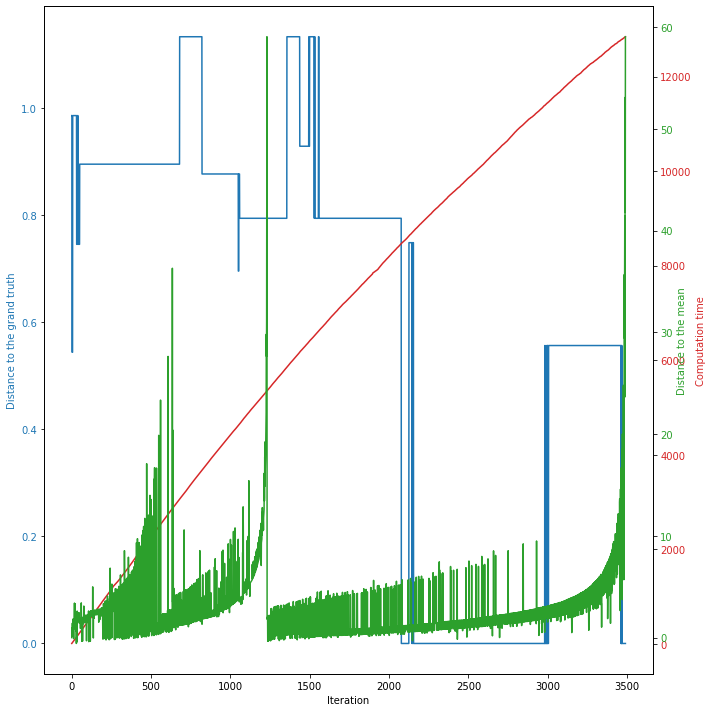

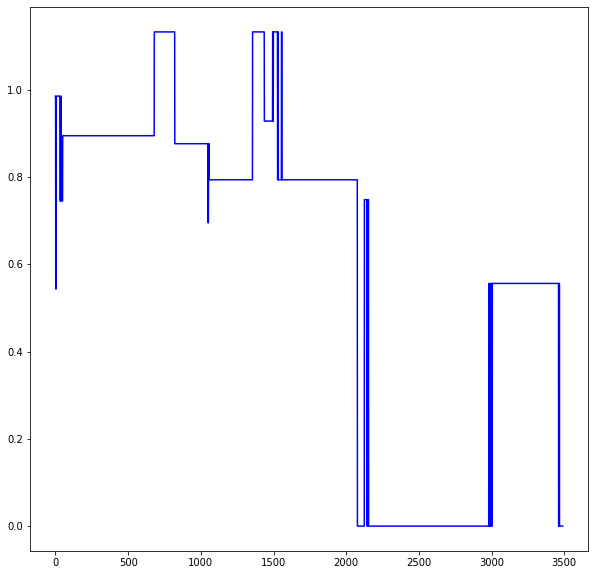

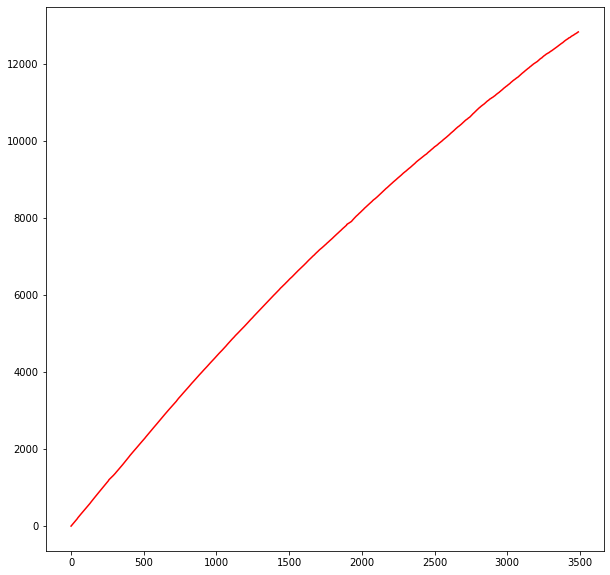

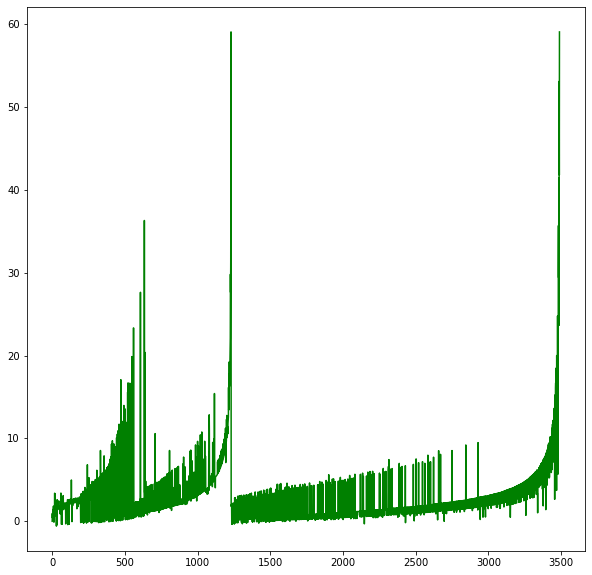

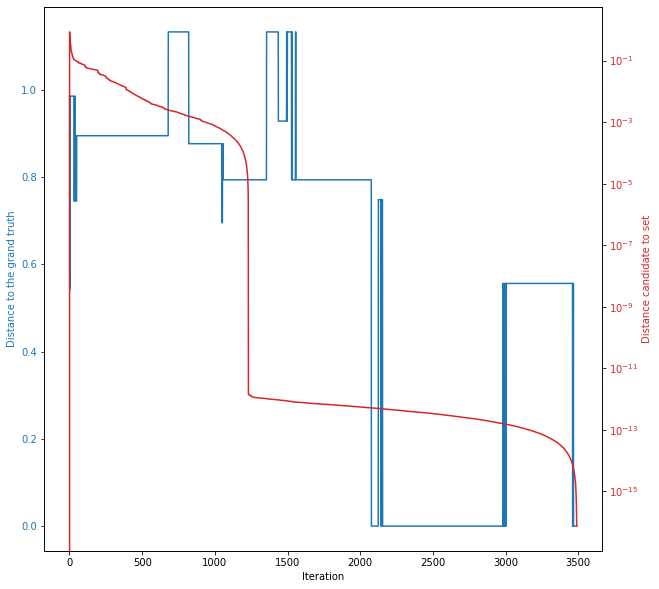

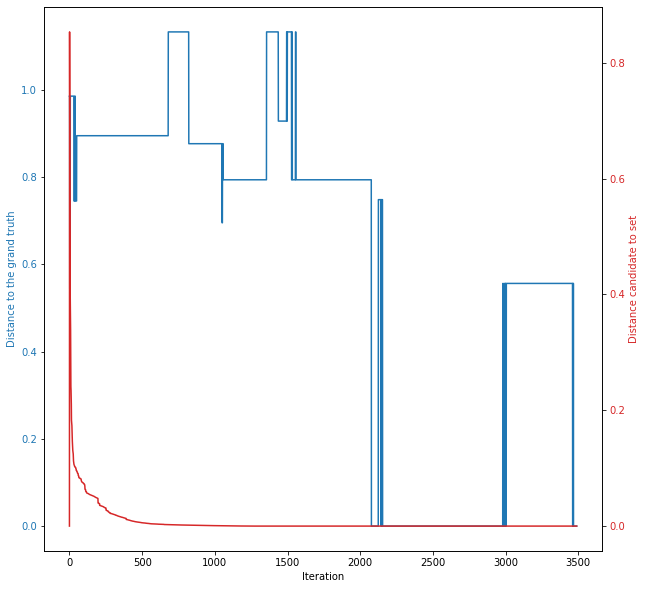

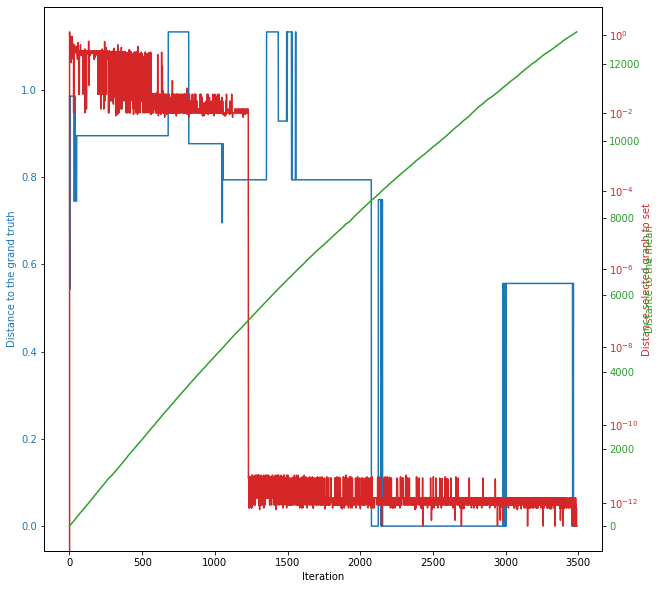

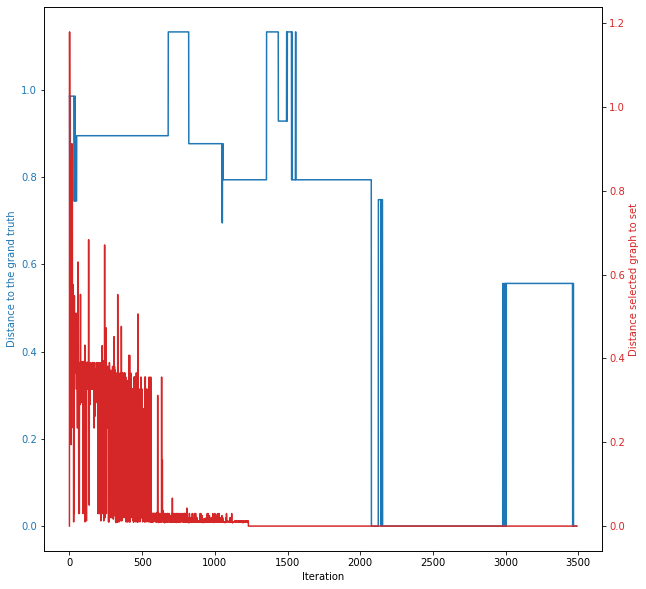

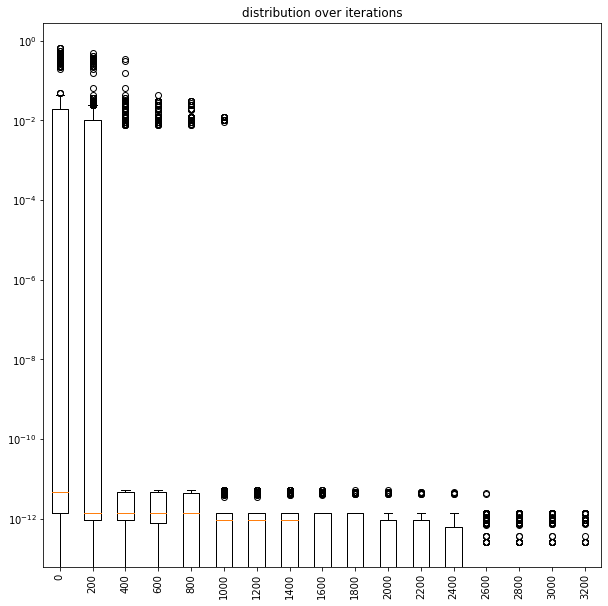

In [18]:
show_plot(distances_to_real_median, computation_time, distances_to_mean, born_inf=0, borne_sup=len(graphs))

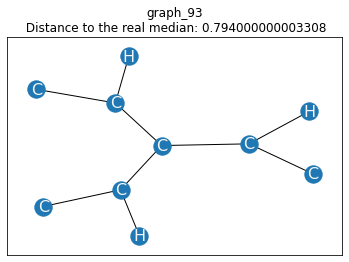

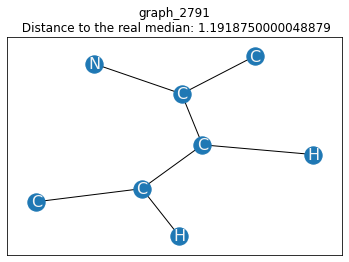

In [27]:
show_graph(int(median_over_iterations[1233]), save = True)
show_graph(2791)


In [71]:
median_over_iterations[-1]

3407.0

In [19]:
val, count = np.unique(selected_graph, return_counts= True)

3490